In [42]:
ip = {'inplace': True}

In [27]:
from json import load

<Axes: xlabel='lat'>

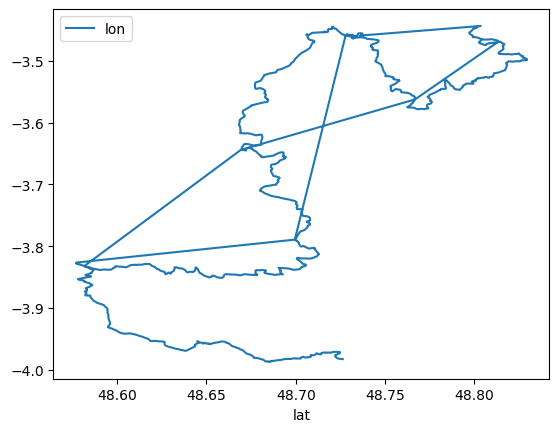

In [28]:
import gpxpy
import pandas as pd

# Load gpx.
gpx_path = 'back/Roscoff_Perros-Guirec.gpx'
with open(gpx_path) as f:
    gpx = gpxpy.parse(f)

# Convert to a dataframe one point at a time.
points = []
for segment in gpx.tracks[0].segments:
    for p in segment.points:
        points.append({
            'time': p.time,
            'lat': p.latitude,
            'lon': p.longitude,
            'elevation': p.elevation,
        })
df = pd.DataFrame.from_records(points)
df.plot(x='lat', y='lon')


In [29]:
df.head()

,time,lat,lon,elevation
0,NaT,48.726305,-3.982994,5.3
1,NaT,48.726230,-3.982973,4.7
2,NaT,48.726127,-3.982955,5.2
3,NaT,48.725965,-3.982907,5.7
4,NaT,48.725871,-3.982873,5.5


<Axes: xlabel='lat', ylabel='lon'>

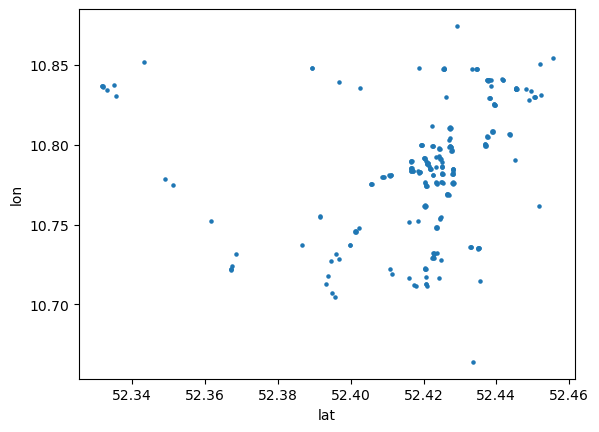

In [43]:
signalsfile = open('data/traffic_signals.json')
ts = load(signalsfile)
lights = pd.DataFrame(ts['elements'])
lights.drop(columns=['type', 'tags'], **ip)
lights.plot.scatter(x='lat', y='lon', marker='.')

In [44]:
lights

,id,lat,lon
0,514510,52.418812,10.848097
1,26305117,52.394684,10.727377
2,26305358,52.418034,10.711262
3,26561647,52.367386,10.724323
4,27195093,52.423525,10.785890
...,...,...,...
259,11465225122,52.427039,10.798720
260,11597803898,52.422061,10.785128
261,12357775971,52.422535,10.728829
262,12357775972,52.422785,10.729138


In [ ]:
import pandas as pd
import folium

# Define the initial location for the map (center point)
map_center = [lights['lat'].mean(), lights['lon'].mean()]
osm_map = folium.Map(location=map_center, zoom_start=14, tiles="OpenStreetMap")

# Add scatter points to the map
for _, row in lights.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5,
        # popup=row['label'],
        color="blue",
        fill=True,
        fill_color="blue"
    ).add_to(osm_map)

# Show map in Jupyter Notebook
osm_map

In [33]:
import gpxpy
import gpxpy.gpx
from gpxpy.gpx import GPXWaypoint

import os
import os.path

print(os.path.abspath(os.curdir))

/home/tor/Desktop/501-Not-Implemented


In [34]:
from math import sqrt

def gpx_dist(w1: GPXWaypoint, w2: GPXWaypoint):
    """Cartesian distance btw. two waypoints"""
    return sqrt((w1.latitude - w2.latitude)**2 + (w1.longitude - w2.longitude)**2)

In [35]:

gpx_file = open('back/Roscoff_Perros-Guirec.gpx', 'r')
gpx = gpxpy.parse(gpx_file)

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            print(f'Point at ({point.latitude},{point.longitude}) -> {point.elevation}')

for waypoint in gpx.waypoints:
    print(f'waypoint {waypoint.name} -> ({waypoint.latitude},{waypoint.longitude})')

for route in gpx.routes:
    print('Route:')
    for point in route.points:
        print(f'Point at ({point.latitude},{point.longitude}) -> {point.elevtion}')

Point at (48.726304979176675,-3.982993563773938) -> 5.30000000000291
Point at (48.72623035828412,-3.9829726446543385) -> 4.69999999999709
Point at (48.72612667110164,-3.9829546542797467) -> 5.19999999999709
Point at (48.725965124843256,-3.9829070729298808) -> 5.69999999999709
Point at (48.72587142938057,-3.9828726793245273) -> 5.5
Point at (48.72576425099027,-3.982806453230663) -> 5.69999999999709
Point at (48.72567955768236,-3.9827385375789146) -> 5.609899999995832
Point at (48.72567025076134,-3.9827310750289113) -> 5.600000000005821
Point at (48.72552984416429,-3.9826617613709225) -> 0.0
Point at (48.725412537198615,-3.9826296635284164) -> 0.0
Point at (48.725351694726704,-3.982620145287853) -> 0.0
Point at (48.72525859947451,-3.982606304923041) -> 0.0
Point at (48.725157520450125,-3.982590029931423) -> 0.0
Point at (48.72507786383854,-3.98257799055091) -> 0.0
Point at (48.72493043572983,-3.982551410237394) -> 0.0
Point at (48.724815578113535,-3.982523735588729) -> 0.0
Point at (48.7